In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import lightgbm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,precision_score,f1_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [3]:
train.head()

,user_id,merchant_id,label,user_num,user_days,item_num,cat_num,brand_num,merchant_num,uclick_num,...,age_2,age_3,age_4,age_5,age_6,age_7,age_8,g_0,g_1,g_2
0,34176,3906,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,1,0,0
1,34176,121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,1,0,0
2,34176,4356,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,1,0,0
3,34176,2217,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,1,0,0
4,230784,4818,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0


In [4]:
test.head()

,user_id,merchant_id,user_num,user_days,item_num,cat_num,brand_num,merchant_num,uclick_num,uadd_num,...,age_2,age_3,age_4,age_5,age_6,age_7,age_8,g_0,g_1,g_2
0,163968,4605,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
1,360576,1581,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,1
2,98688,1964,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,1,0,0
3,98688,3645,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,1,0,0
4,295296,3361,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,1,0


In [5]:
pd.set_option('display.max_columns',None)

In [6]:
train['label'].value_counts()

0.0    244912
1.0     15952
Name: label, dtype: int64

In [7]:
n = sum(train['label']==1)

In [8]:
posdata = train[train['label']==0].sample(n, random_state=123) #随机采样n条数据，平衡正负样本

In [9]:
negdata = train[train['label']==1]

In [10]:
data = pd.concat([posdata, negdata] ,axis=0)

In [11]:
data.head()

,user_id,merchant_id,label,user_num,user_days,item_num,cat_num,brand_num,merchant_num,uclick_num,uadd_num,ubuy_num,usave_num,user_buy_rate,merchant_benum,merchant_user,merchant_item,merchant_cat,merchant_brand,mclick_num,mbuy_num,madd_num,msave_num,merchant_rebuy,merchant_buy_rate,user_merchant,user_merchant_item,user_merchant_cat,user_merchant_brand,user_merchant_click,user_merchant_add,user_merchant_buy,user_merchant_save,user_merchant_buy_rate,user_merchant_days,age_0,age_1,age_2,age_3,age_4,age_5,age_6,age_7,age_8,g_0,g_1,g_2
104911,304309,102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,112.0,17.0,12.0,4.0,1.0,82.0,0.0,36.0,24.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,1,0
121938,75751,1340,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,366.0,27.0,119.0,10.0,1.0,290.0,0.0,134.0,18.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,1,0,0
231187,279080,2582,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,2.0,1.0,1.0,2.0,0.0,4.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,1,0,0
37685,71919,1470,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,5.0,4.0,2.0,1.0,7.0,0.0,10.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,1,0,0
156924,33103,3480,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,1,0


In [12]:
data.shape

(31904, 47)

In [13]:
data['label'].value_counts()

0.0    15952
1.0    15952
Name: label, dtype: int64

In [14]:
sc = StandardScaler()
df = sc.fit_transform(data.iloc[:,3:]) #array
df = pd.DataFrame(df, columns=data.columns[3:])

In [15]:
df.head()

,user_num,user_days,item_num,cat_num,brand_num,merchant_num,uclick_num,uadd_num,ubuy_num,usave_num,user_buy_rate,merchant_benum,merchant_user,merchant_item,merchant_cat,merchant_brand,mclick_num,mbuy_num,madd_num,msave_num,merchant_rebuy,merchant_buy_rate,user_merchant,user_merchant_item,user_merchant_cat,user_merchant_brand,user_merchant_click,user_merchant_add,user_merchant_buy,user_merchant_save,user_merchant_buy_rate,user_merchant_days,age_0,age_1,age_2,age_3,age_4,age_5,age_6,age_7,age_8,g_0,g_1,g_2
0,-0.072616,-0.058259,-0.074721,-0.094349,-0.106134,-0.112702,-0.065609,-0.01293,-0.102038,-0.045479,-0.089853,-0.254762,-0.158852,-0.435667,-0.418567,-0.307331,-0.261718,-0.263762,-0.314502,-0.024100,-0.345817,-0.214068,-0.068262,-0.071423,-0.094562,-0.119103,-0.060091,-0.01252,-0.107124,-0.040973,-0.07534,-0.052925,-0.524441,0.0,-0.347415,1.684453,-0.511055,-0.340118,-0.307615,-0.127456,-0.052891,-1.505938,1.660139,-0.203527
1,-0.072616,-0.058259,-0.074721,-0.094349,-0.106134,-0.112702,-0.065609,-0.01293,-0.102038,-0.045479,-0.089853,0.417116,0.236253,0.316082,0.262162,-0.307331,0.396589,-0.263762,0.922985,-0.136382,-0.428403,-0.214068,-0.068262,-0.071423,-0.094562,-0.119103,-0.060091,-0.01252,-0.107124,-0.040973,-0.07534,-0.052925,-0.524441,0.0,-0.347415,-0.593664,-0.511055,-0.340118,3.250816,-0.127456,-0.052891,0.664038,-0.602359,-0.203527
2,-0.072616,-0.058259,-0.074721,-0.094349,-0.106134,-0.112702,-0.065609,-0.01293,-0.102038,-0.045479,-0.089853,-0.540443,-0.751508,-0.505924,-0.758932,-0.307331,-0.514913,-0.263762,-0.718580,-0.473225,-0.648633,-0.214068,-0.068262,-0.071423,-0.094562,-0.119103,-0.060091,-0.01252,-0.107124,-0.040973,-0.07534,-0.052925,-0.524441,0.0,-0.347415,-0.593664,1.956737,-0.340118,-0.307615,-0.127456,-0.052891,0.664038,-0.602359,-0.203527
3,-0.072616,-0.058259,-0.074721,-0.094349,-0.106134,-0.112702,-0.065609,-0.01293,-0.102038,-0.045479,-0.089853,-0.516636,-0.632976,-0.491873,-0.645477,-0.307331,-0.499088,-0.263762,-0.642815,-0.435798,-0.634869,-0.214068,-0.068262,-0.071423,-0.094562,-0.119103,-0.060091,-0.01252,-0.107124,-0.040973,-0.07534,-0.052925,-0.524441,0.0,-0.347415,1.684453,-0.511055,-0.340118,-0.307615,-0.127456,-0.052891,0.664038,-0.602359,-0.203527
4,-0.072616,-0.058259,-0.074721,-0.094349,-0.106134,-0.112702,-0.065609,-0.01293,-0.102038,-0.045479,-0.089853,-0.545733,-0.791018,-0.512950,-0.758932,-0.307331,-0.518078,-0.263762,-0.743834,-0.473225,-0.662398,-0.214068,-0.068262,-0.071423,-0.094562,-0.119103,-0.060091,-0.01252,-0.107124,-0.040973,-0.07534,-0.052925,-0.524441,0.0,-0.347415,1.684453,-0.511055,-0.340118,-0.307615,-0.127456,-0.052891,-1.505938,1.660139,-0.203527


In [16]:
xtrain, xval, ytrain, yval = train_test_split(df, data['label'],test_size=0.2, random_state=2021)

In [17]:
xtrain.shape,ytrain.shape,xval.shape,yval.shape

((25523, 44), (25523,), (6381, 44), (6381,))

In [18]:
model_lgb = lightgbm.LGBMClassifier(n_estimators=1000, 
                         max_depth=8, 
                         num_leaves=25, 
                         colsample_bytree=0.5, 
                         learning_rate=0.1, 
                         metric='auc' 
                         )
model_lgb.fit(xtrain, ytrain,  
              eval_metric='auc', 
              eval_set=[(xtrain, ytrain), (xval, yval)], 
              verbose=False,  #True 查看训练进度
              early_stopping_rounds=100 
              )

LGBMClassifier(colsample_bytree=0.5, max_depth=8, metric='auc',
               n_estimators=1000, num_leaves=25)

In [19]:
model_lgb.best_score_

defaultdict(collections.OrderedDict,
            {'training': OrderedDict([('auc', 0.7079642233815098)]),
             'valid_1': OrderedDict([('auc', 0.6751282723408808)])})

In [20]:
pres = model_lgb.predict(xval)

In [21]:
pres

array([0., 0., 1., ..., 1., 1., 1.])

In [22]:
model_lgb.predict_proba(xval) #[预测为0的概率,预测为1的概率]

array([[0.61049364, 0.38950636],
       [0.57399064, 0.42600936],
       [0.30560153, 0.69439847],
       ...,
       [0.39890087, 0.60109913],
       [0.42043733, 0.57956267],
       [0.16547644, 0.83452356]])

```
confusion_matrix(yval, pres) 用于计算预测结果与真实标签之间的混淆矩阵。yval是真实的标签向量（或数组）,pres 是对 yval 进行预测得到的标签向量。
混淆矩阵是一个用于衡量分类模型性能的矩阵，它将预测结果划分为四个不同的类别：
真阳性（True Positive, TP），真阴性（True Negative, TN），假阳性（False Positive, FP），假阴性（False Negative, FN）
            预测为正类    预测为负类
真实为正类       TP          FN
真实为负类       FP          TN
```

In [23]:
confusion_matrix(yval, pres)

array([[1832, 1265],
       [1131, 2153]], dtype=int64)

```
classification_report()是一个函数调用，用于生成分类模型的分类报告。yval 是真实的标签向量（或数组），而 pres 是对 yval 进行预测得到的标签向量。
分类报告是一种汇总分类模型性能指标的表格，提供了准确率（precision）、召回率（recall）、F1-score、支持数（support）等指标。例如：  
 
标签       precision   recall    f1-score   support
0.0           0.64      0.66      0.65      3097
1.0           0.67      0.66      0.66      3284
  
accuracy                          0.66      6381
macro avg     0.66      0.66      0.66      6381
weighted avg  0.66      0.66      0.66      6381
准确率是指在预测为某个类别的样本中，真实为该类别的样本的比例。召回率是指在所有真实为某个类别的样本中，预测为该类别的样本的比例。
F1-score是准确率和召回率的调和平均值，综合考虑了两者。支持数表示每个类别在数据集中的样本数量。
```

In [24]:
print(classification_report(yval, pres))

              precision    recall  f1-score   support

         0.0       0.62      0.59      0.60      3097
         1.0       0.63      0.66      0.64      3284

    accuracy                           0.62      6381
   macro avg       0.62      0.62      0.62      6381
weighted avg       0.62      0.62      0.62      6381



In [25]:
print('准确率：', precision_score(yval, pres))
print('F1值：', f1_score(yval, pres))  #F1 分数 = 2 * (精确率 * 召回率) / (精确率 + 召回率)
presprob = model_lgb.predict_proba(xval)[:,1] 
print('AUC值：', roc_auc_score(yval, presprob))

准确率： 0.6299005266237566
F1值： 0.642494777678305
AUC值： 0.6751282723408807


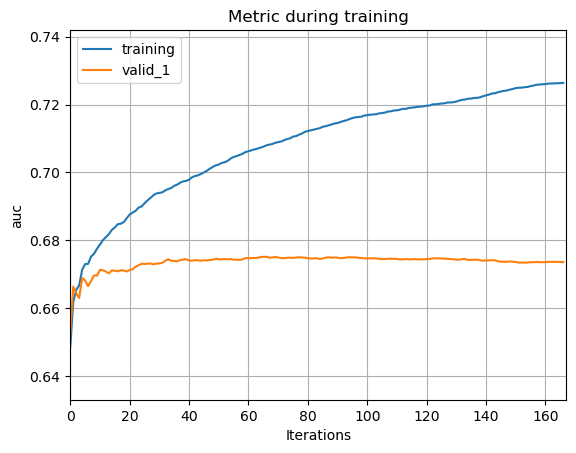

In [26]:
lightgbm.plot_metric(model_lgb.evals_result_, metric='auc' ) #绘制auc曲线图
plt.show()

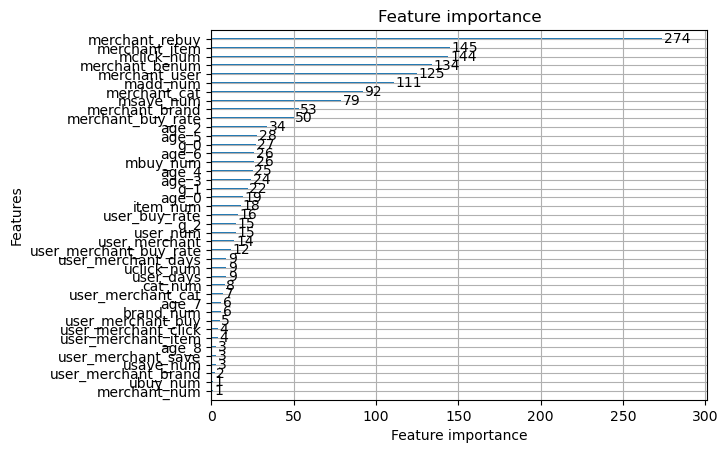

In [27]:
lightgbm.plot_importance(model_lgb) #绘制特征重要性
plt.show()

In [28]:
testdf = StandardScaler().fit_transform(test.iloc[:,2:])
testdf = pd.DataFrame(testdf, columns=test.columns[2:])
test['prob'] = model_lgb.predict_proba(testdf)[:,1]
test.head()

,user_id,merchant_id,user_num,user_days,item_num,cat_num,brand_num,merchant_num,uclick_num,uadd_num,ubuy_num,usave_num,user_buy_rate,merchant_benum,merchant_user,merchant_item,merchant_cat,merchant_brand,mclick_num,mbuy_num,madd_num,msave_num,merchant_rebuy,merchant_buy_rate,user_merchant,user_merchant_item,user_merchant_cat,user_merchant_brand,user_merchant_click,user_merchant_add,user_merchant_buy,user_merchant_save,user_merchant_buy_rate,user_merchant_days,age_0,age_1,age_2,age_3,age_4,age_5,age_6,age_7,age_8,g_0,g_1,g_2,prob
0,163968,4605,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0,11.0,18.0,11.0,1.0,39.0,0.0,34.0,6.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,1,0,0,0.597993
1,360576,1581,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0,5.0,15.0,2.0,1.0,22.0,0.0,28.0,2.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,1,0.436176
2,98688,1964,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0,6.0,24.0,10.0,1.0,34.0,0.0,28.0,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,1,0,0,0.549234
3,98688,3645,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,2.0,3.0,1.0,1.0,5.0,0.0,4.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,1,0,0,0.624136
4,295296,3361,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,3.0,3.0,1.0,1.0,12.0,0.0,6.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,1,0,0.387258


In [29]:
test[['user_id','merchant_id','prob']].to_csv('./prediction.csv', index=None)